In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix, roc_curve , roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'C:\Users\DELL\Desktop\datasets\Bank Marketing.csv')

In [3]:
data

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,2
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,2
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,2
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,1


In [4]:
###Explotary Analysis


In [5]:
# Let's create a Pie-chart to represent the distribution in target variable

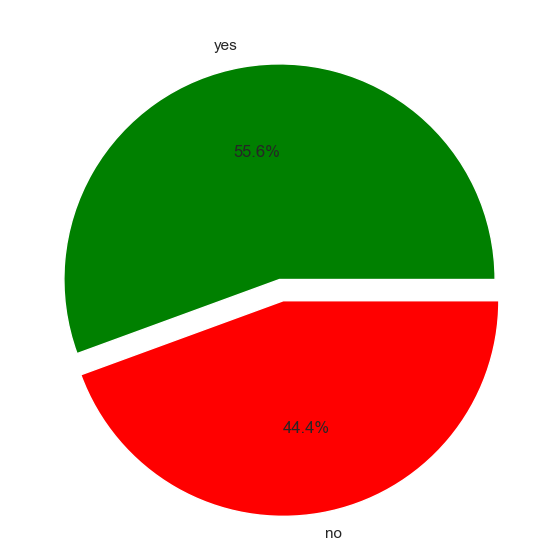

In [6]:
plt.figure(figsize = (13, 7))

sizes = data['Housing Loan'].value_counts().values
labels = ['yes', 'no']
colors = ['Green', 'Red']
explode = [0, .1]

plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.show()

In [7]:
 
#There is very clear most of the above applicant has a housing loan

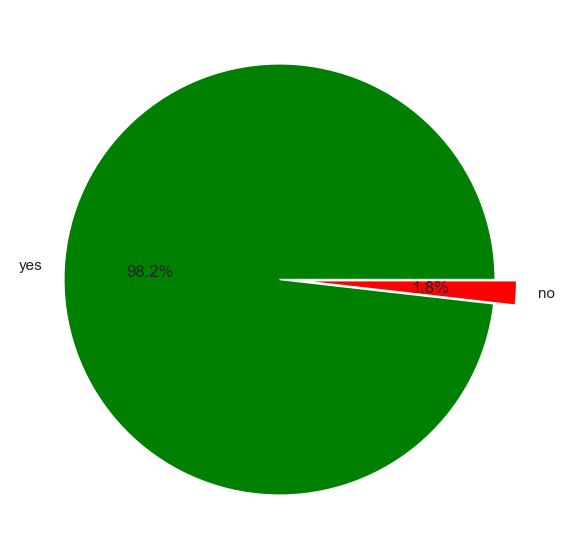

In [8]:
plt.figure(figsize = (13, 7))

sizes = data['Credit'].value_counts().values
labels = ['yes', 'no']
colors = ['Green', 'Red']
explode = [0, .1]

plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.show()

In [9]:
#In this case its clear that Most of the applicant has a good credit score

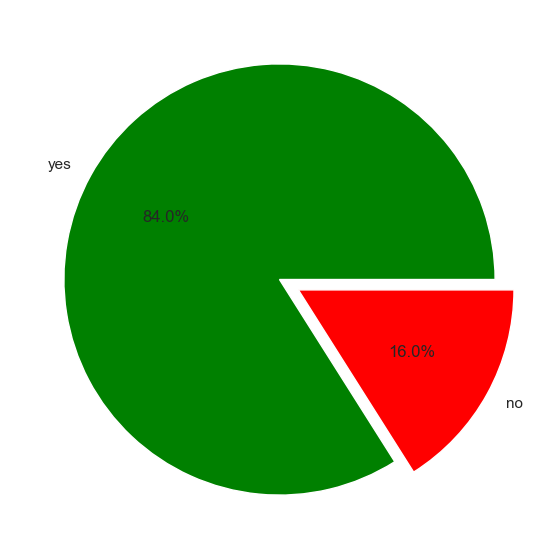

In [10]:
plt.figure(figsize = (13, 7))

sizes = data['Personal Loan'].value_counts().values
labels = ['yes', 'no']
colors = ['Green', 'Red']
explode = [0, .1]

plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.show()

In [11]:
# This is very clear 84% has a Personal loan on them


In [12]:
#Observsation Chart 1
#The above all chart shows that Most of the one has good credit score and having a personal loan but the percentage of housing loan is less .


In [13]:
#Now analyse the numerical value

In [14]:
data_num = data.select_dtypes(include = np.number)
data_num


,Age,Balance (euros),Last Contact Day,Last Contact Duration,Campaign,Pdays,Previous,Subscription
0,58,2143,5,261,1,-1,0,1
1,44,29,5,151,1,-1,0,1
2,33,2,5,76,1,-1,0,1
3,47,1506,5,92,1,-1,0,1
4,33,1,5,198,1,-1,0,1
...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,2
45207,71,1729,17,456,2,-1,0,2
45208,72,5715,17,1127,5,184,3,2
45209,57,668,17,508,4,-1,0,1


In [15]:
data_num.isnull().sum()

Age                      0
Balance (euros)          0
Last Contact Day         0
Last Contact Duration    0
Campaign                 0
Pdays                    0
Previous                 0
Subscription             0
dtype: int64

In [16]:
data_num.describe()

,Age,Balance (euros),Last Contact Day,Last Contact Duration,Campaign,Pdays,Previous,Subscription
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,1.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,1.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,1.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,2.000000


In [17]:
from matplotlib.axes import Axes

<Axes: >

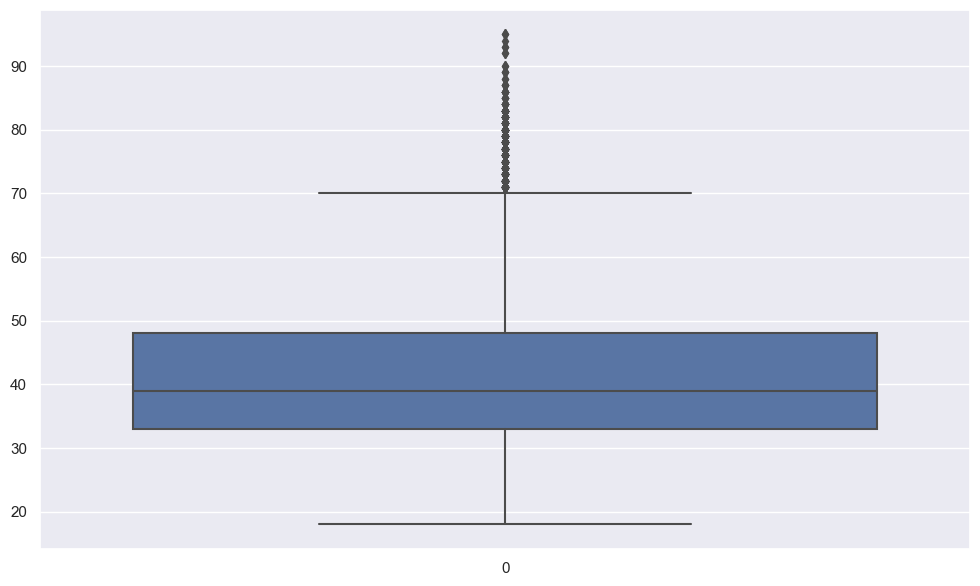

In [18]:
plt.figure(figsize = (12,7))
sns.boxplot(data_num['Age'])

In [19]:
q = data_num['Age'].quantile(0.95)
data_cleaned = data[data_num['Age']<q]

<Axes: >

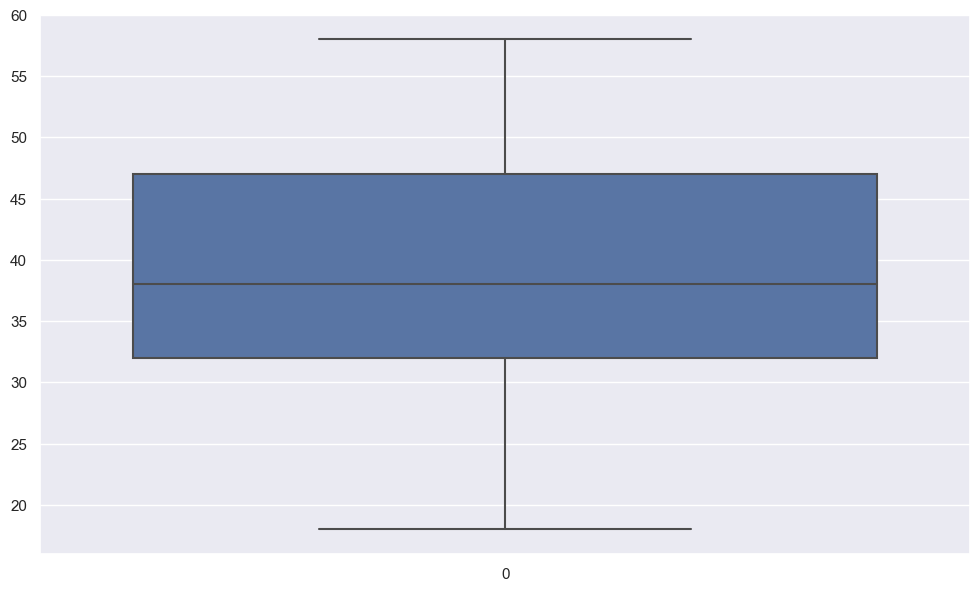

In [20]:
plt.figure(figsize = (12,7))
sns.boxplot(data_cleaned['Age'])

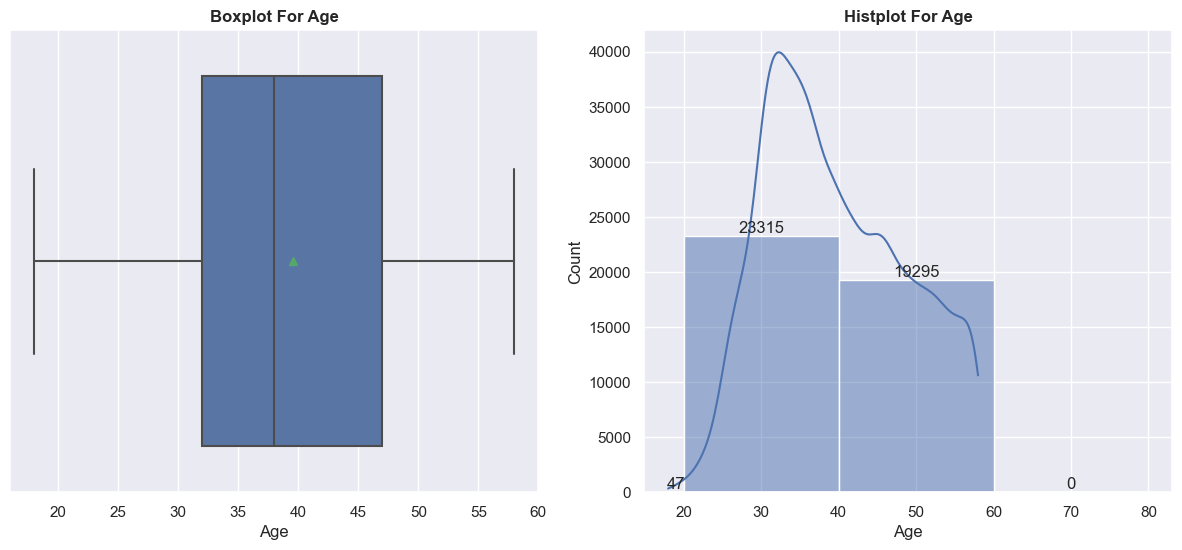

In [21]:
b1 = (18,20,40,60,80)
plt.subplots(1,2,figsize = (15,6))

plt.subplot(121)
sns.boxplot(x='Age',data=data_cleaned,showmeans= True)
plt.title('Boxplot For Age',fontweight='bold',size=12)

plt.subplot(122)
ax = sns.histplot(data=data_cleaned,x='Age',bins=b1,kde = True)

for container in ax.containers:
    ax.bar_label(container)
plt.title('Histplot For Age',fontweight='bold',size=12)
plt.show()

<Axes: >

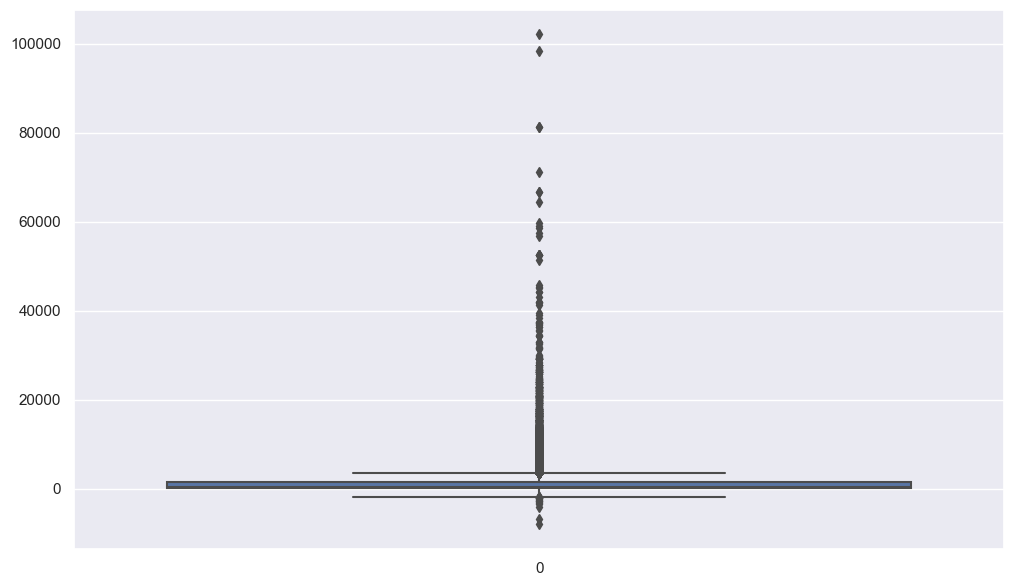

In [22]:
plt.figure(figsize = (12,7))
sns.boxplot(data_num['Balance (euros)'])

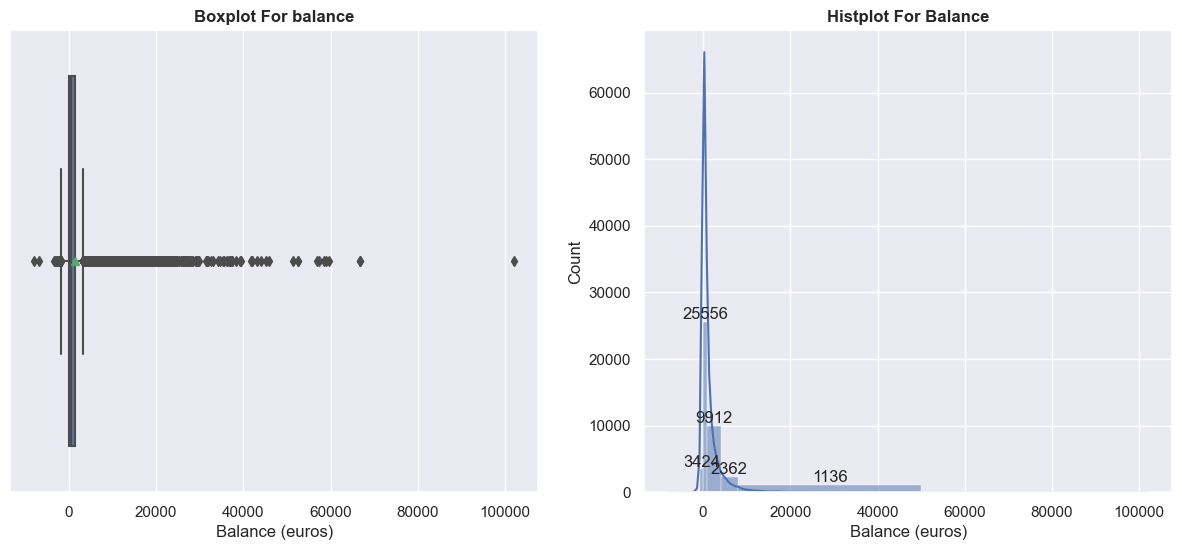

In [23]:
b1 = (-810,0,1000,4000,8000,50000)
plt.subplots(1,2,figsize = (15,6))

plt.subplot(121)
sns.boxplot(x='Balance (euros)',data=data_cleaned,showmeans= True)
plt.title('Boxplot For balance',fontweight='bold',size=12)

plt.subplot(122)
ax = sns.histplot(data=data_cleaned,x='Balance (euros)',bins=b1,kde = True)

for container in ax.containers:
    ax.bar_label(container)
plt.title('Histplot For Balance',fontweight='bold',size=12)
plt.show()

In [24]:
#Lets go for label Encoding 

In [25]:
from sklearn.preprocessing import LabelEncoder 

In [26]:
lec = LabelEncoder()

In [27]:
data["Housing Loan"] = lec.fit_transform (data["Housing Loan"])

In [28]:
data.head

<bound method NDFrame.head of        Age           Job Marital Status  Education Credit  Balance (euros)  \
0       58    management        married   tertiary     no             2143   
1       44    technician         single  secondary     no               29   
2       33  entrepreneur        married  secondary     no                2   
3       47   blue-collar        married    unknown     no             1506   
4       33       unknown         single    unknown     no                1   
...    ...           ...            ...        ...    ...              ...   
45206   51    technician        married   tertiary     no              825   
45207   71       retired       divorced    primary     no             1729   
45208   72       retired        married  secondary     no             5715   
45209   57   blue-collar        married  secondary     no              668   
45210   37  entrepreneur        married  secondary     no             2971   

       Housing Loan Personal Loan

In [29]:
X = data[["Housing Loan", "Personal Loan", "Credit", "Marital Status", "Contact"]]

In [30]:
X["Housing Loan"].unique()

array([1, 0])

In [31]:
data.nunique()

Age                        77
Job                        12
Marital Status              3
Education                   4
Credit                      2
Balance (euros)          7168
Housing Loan                2
Personal Loan               2
Contact                     3
Last Contact Day           31
Last Contact Month         12
Last Contact Duration    1573
Campaign                   48
Pdays                     559
Previous                   41
Poutcome                    4
Subscription                2
dtype: int64

In [32]:
data["Housing Loan"].value_counts(normalize = True)

Housing Loan
1    0.555838
0    0.444162
Name: proportion, dtype: float64

In [33]:
data.drop('Job',axis=1 ,inplace= True)

In [34]:
data.drop('Education',axis=1 ,inplace= True)

In [35]:
data["Personal Loan"] = lec.fit_transform(data["Personal Loan"])
data["Credit"] = lec.fit_transform(data["Credit"])
data["Marital Status"] = lec.fit_transform(data["Marital Status"])
data["Contact"] = lec.fit_transform(data["Contact"])
data["Last Contact Month"] = lec.fit_transform(data["Last Contact Month"])
data["Poutcome"] = lec.fit_transform(data["Poutcome"])



<Axes: >

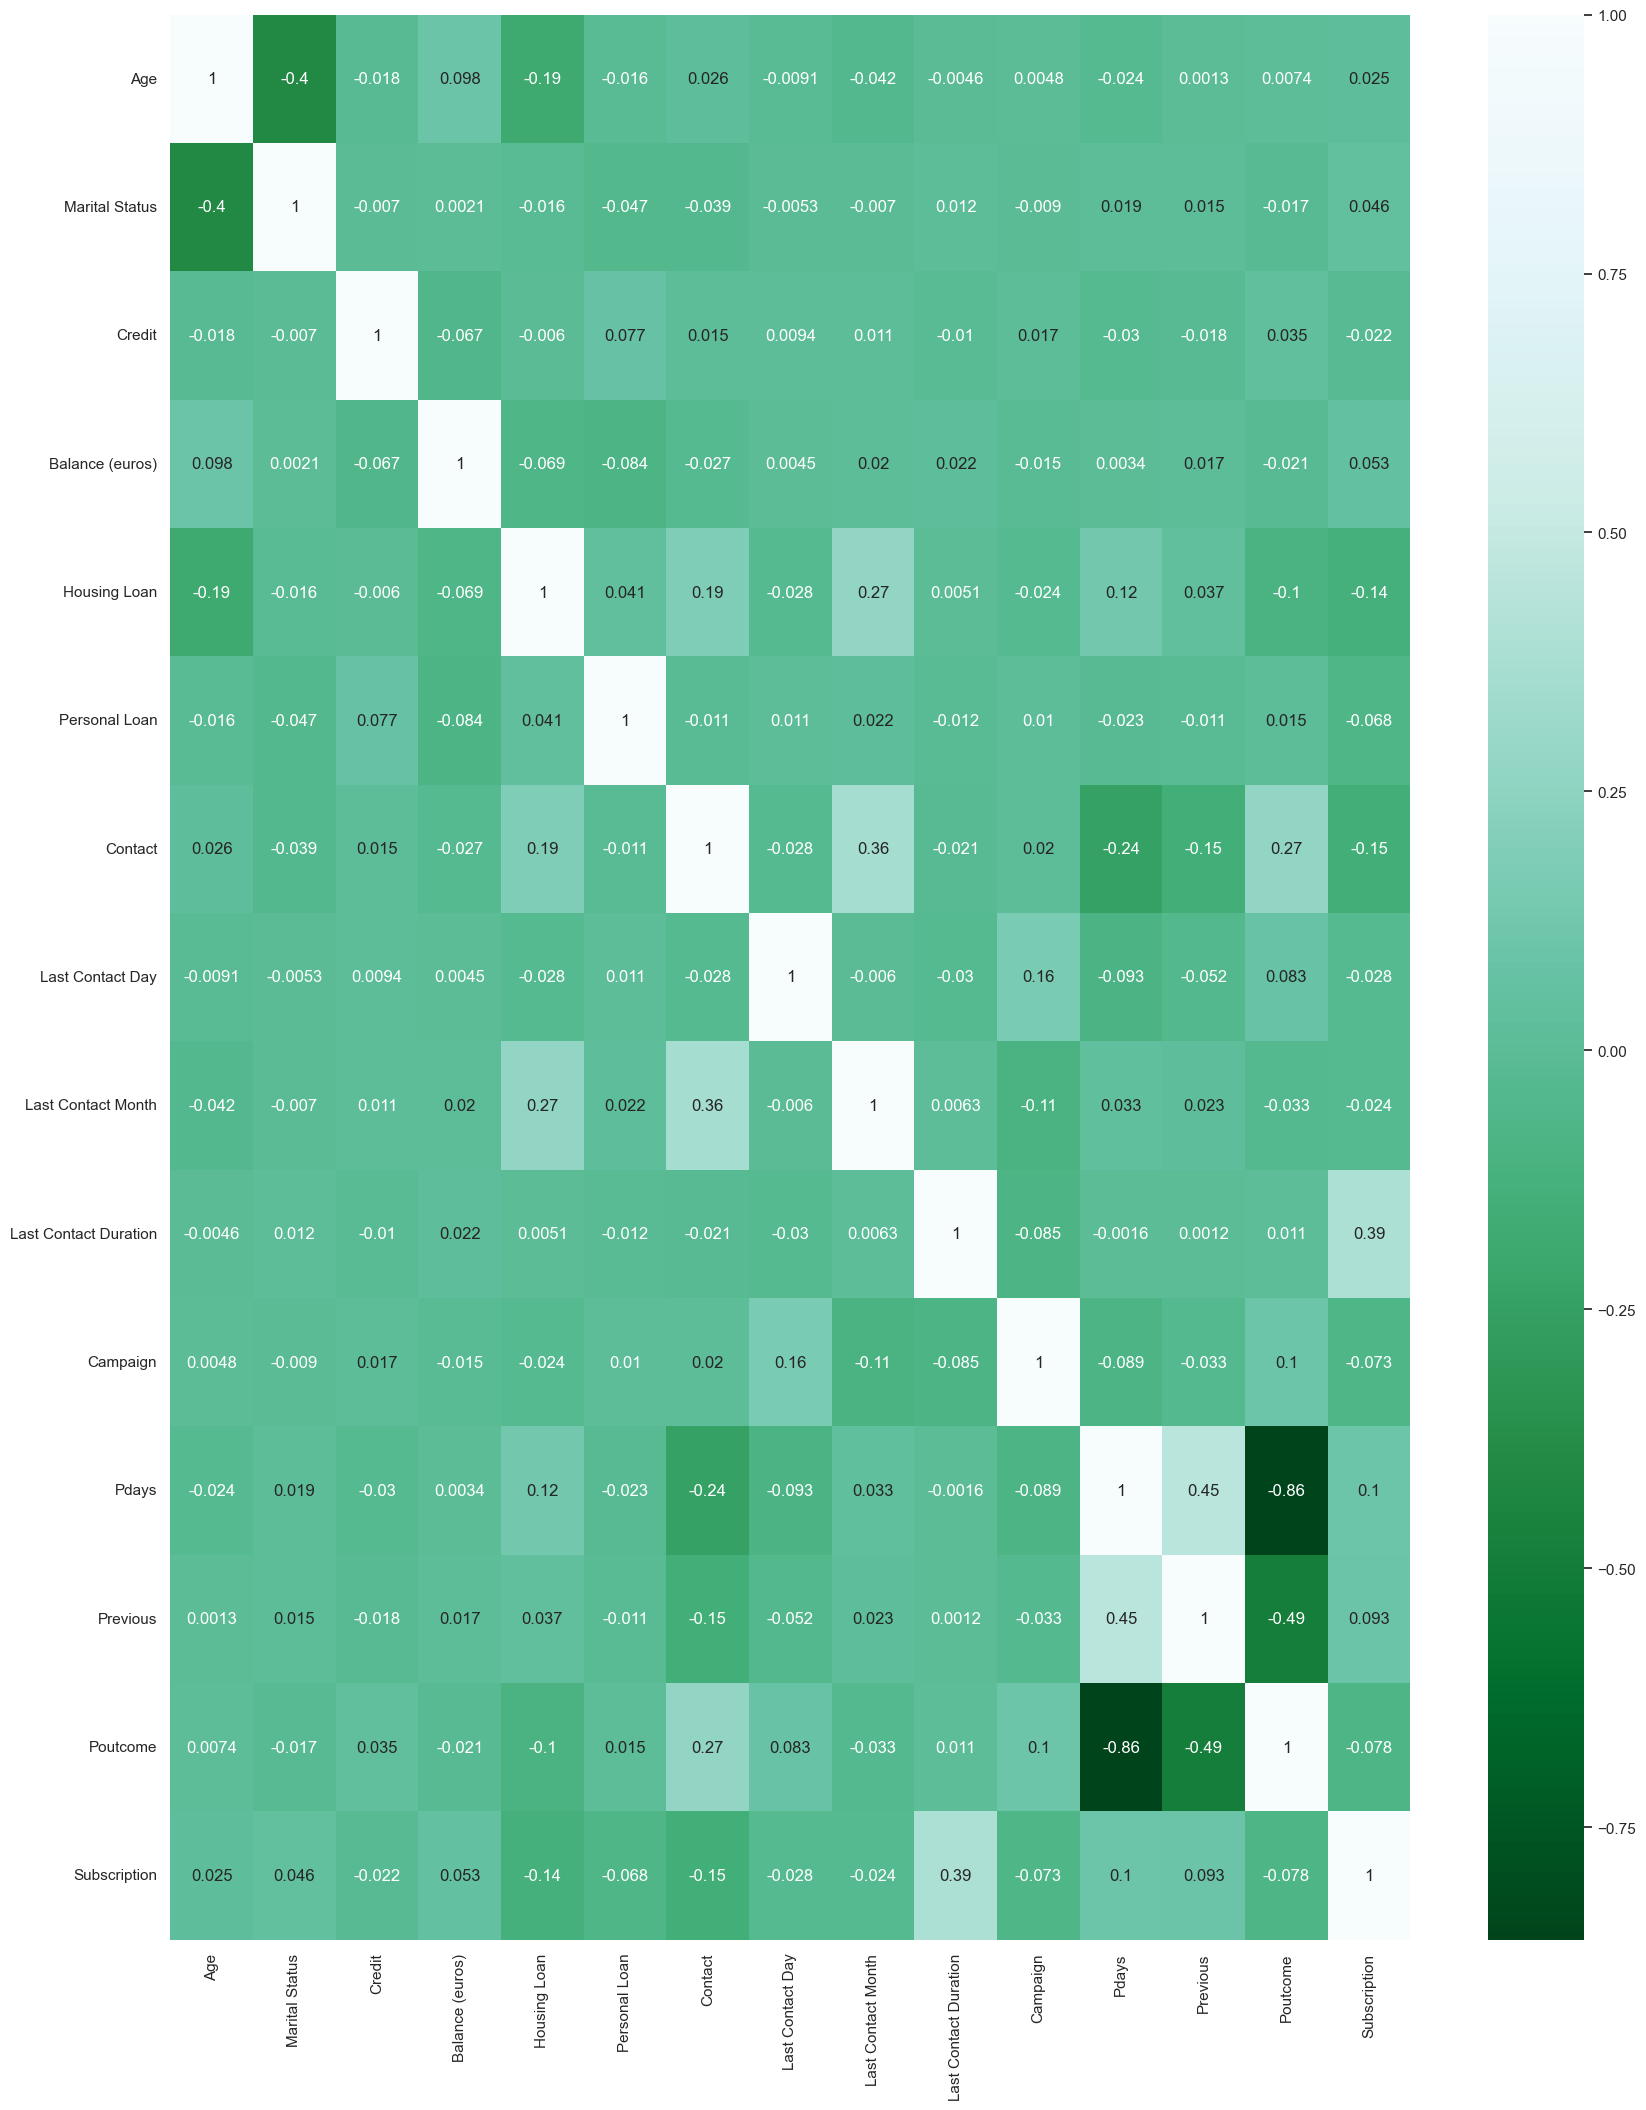

In [36]:
cor = data.corr()
f, ax = plt.subplots (figsize = (20,25))
sns.heatmap(cor, annot = True, cmap = 'BuGn_r')

In [37]:
x = data.drop("Housing Loan", axis = 1)
y = data["Housing Loan"]

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42)

In [39]:
x_train, x_test, y_train, y_test.shape

(       Age  Marital Status  Credit  Balance (euros)  Personal Loan  Contact  \
 12370   53               1       0                0              1        2   
 17313   43               1       0              150              0        1   
 7487    27               2       0             -181              1        2   
 10268   40               0       0              181              0        2   
 9951    41               1       0                0              0        2   
 ...    ...             ...     ...              ...            ...      ...   
 11284   44               2       0             1059              0        2   
 44732   23               2       0              508              0        0   
 38158   34               0       0             1317              0        0   
 860     33               1       0              165              0        2   
 15795   38               1       0              -41              0        0   
 
        Last Contact Day  Last Contact

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [42]:
y_pred = log_reg.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [44]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.6803302860513123

In [45]:
auc = roc_auc_score(y_test, y_pred)
auc

0.6694073149184617

In [46]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[1704,  808],
       [1360, 2910]], dtype=int64)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [48]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [49]:
y_pred = knn.predict(x_test)

In [50]:
knn.score(x_train,y_train)

0.7329360639100679

In [51]:
accuracy_score(y_test,y_pred)

0.5906812149808316

In [52]:
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [53]:
knn.score(x_test,y_test)

0.5906812149808316

In [54]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [55]:
model.fit(x_train,y_train)

GaussianNB()

In [56]:
y_pred = model.predict(x_test)

In [57]:
print(accuracy_score(y_test, y_pred))

0.6701562960778531


In [58]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[2076,  988],
       [1249, 2469]], dtype=int64)

In [60]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [61]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.6701562960778531

In [62]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.6775456919060052

In [63]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.6243609022556391

In [64]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.6498669588354985

In [65]:
auc = roc_auc_score(y_test, y_pred)
auc

0.6708061972171231

In [66]:
from sklearn.svm import SVC

In [69]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [70]:
model.predict(x_test)

array([1, 0, 1, ..., 1, 1, 1])

In [71]:
accuracy_score(y_test,model.predict(x_test))

0.5572102624594515

In [72]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image
get_ipython().system('pip install pydotplus -U')
import pydotplus
get_ipython().system('pip install graphviz')
import graphviz
from sklearn import tree

In [73]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [74]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name


['Housing Loan', 'Personal Loan', 'Credit', 'Marital Status', 'Contact']

In [77]:
clf.score(x_train,y_train)

1.0

In [78]:
py_pred = clf.predict(x_test)

In [79]:
clf.score(x_test,y_test)

0.716602772043645

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rand_clf = RandomForestClassifier(random_state=6)

In [82]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=6)

In [83]:
rand_clf.score(x_test,y_test)

0.7935712179298142

In [85]:
predict_test1 = knn.predict(x_test)
predict_test2 = rand_clf.predict(x_test)

In [86]:
predict_test = np.column_stack((predict_test1,predict_test2))
predict_test

array([[1, 1],
       [1, 0],
       [1, 1],
       ...,
       [0, 0],
       [1, 1],
       [0, 0]])